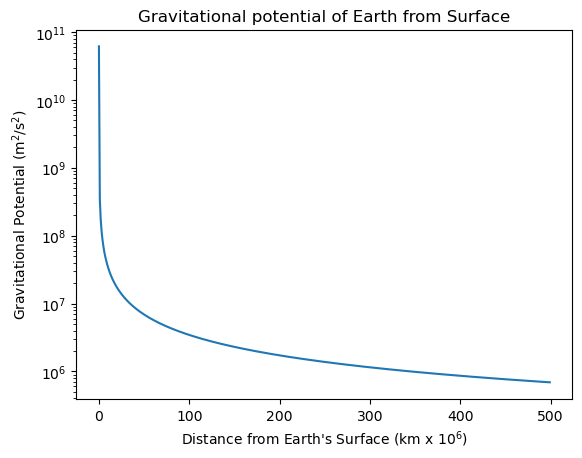

In [11]:
#Part 1:1-2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

fig0, ax0 = plt.subplots(1,1)

X = np.linspace (6378, 5.7e8, 500)
Y = 0

r_1d = np.sqrt(X**2 + Y**2)
G = 6.67e-11
ME = 5.9e24

Phi =  np.abs(-(G * ME) / r_1d)

ax0.plot(Phi)
ax0.set_yscale('log')
ax0.set_title("Gravitational potential of Earth from Surface")
ax0.set_ylabel('Gravitational Potential (m$^2$/s$^2$)')
ax0.set_xlabel("Distance from Earth's Surface (km x 10$^6$)");
#GOOD RETURN
# plt.savefig("Part1_1-2.png")

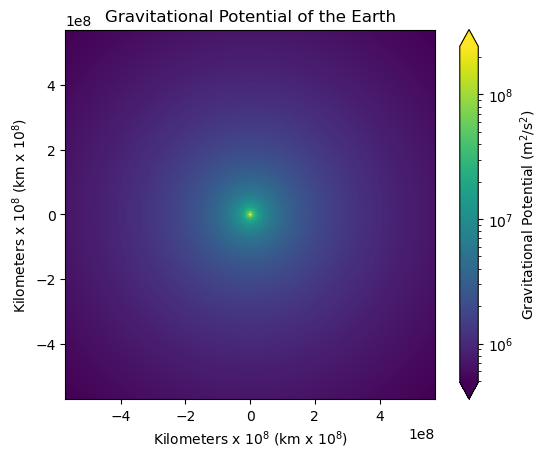

In [2]:
#Part 1.3
x = np.linspace(-5.7*10**8, 5.7*10**8, 500)
y = x.copy()
x_grid, y_grid = np.meshgrid(x,y) 

r = np.sqrt(x_grid**2 + y_grid**2)

def grav_pot(x,y):
    return np.abs(-(G * ME) / (np.sqrt(x_grid**2 + y_grid**2)))
zE = grav_pot(x_grid, y_grid)

fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, zE)
ax.set_aspect("equal") 
ax.set_title('Gravitational Potential of the Earth')
ax.set_xlabel('Kilometers x 10$^8$ (km x 10$^8$)')
ax.set_ylabel('Kilometers x 10$^8$ (km x 10$^8$)')
pcm = ax.pcolormesh(x_grid, y_grid, zE, norm=colors.LogNorm(vmin=zE.min(), vmax=zE.max()), shading='auto')
cbar = fig.colorbar(pcm, ax=ax, extend='both')
cbar.set_label("Gravitational Potential (m$^2$/s$^2$)")
#GOOD RETURN
# plt.savefig("Part1_3.pdf")

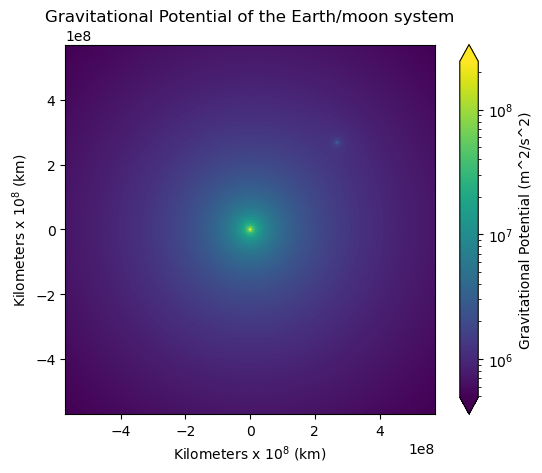

In [3]:
#part 2.1
x_mcart = (3.8 * 10**8) / np.sqrt(2)
y_mcart = x_mcart.copy()

MM = 7.3 * 10**22

def grav_Moon(xM,yM):
    return np.abs(-(G * MM) / (np.sqrt((x_mcart-x_grid)**2 + (y_mcart-y_grid)**2)))
zM = grav_Moon(x_grid, y_grid)

Z_Vals = np.abs(zE) + np.abs(zM)

fig, ax = plt.subplots(1,1)
meshE = ax.pcolormesh(x_grid, y_grid, Z_Vals)
meshM = ax.pcolormesh(x_grid, y_grid, Z_Vals)
ax.set_aspect("equal") 
ax.set_title('Gravitational Potential of the Earth/moon system')
ax.set_xlabel("Kilometers x 10$^8$ (km)")
ax.set_ylabel('Kilometers x 10$^8$ (km)')
pcm = ax.pcolormesh(x_grid, y_grid, Z_Vals, norm=colors.LogNorm(vmin=Z_Vals.min(), vmax=Z_Vals.max()), shading='auto')
cbar = fig.colorbar(pcm, ax=ax, extend='both')
cbar.set_label("Gravitational Potential (m^2/s^2)")
# plt.savefig("Part2_1.png")

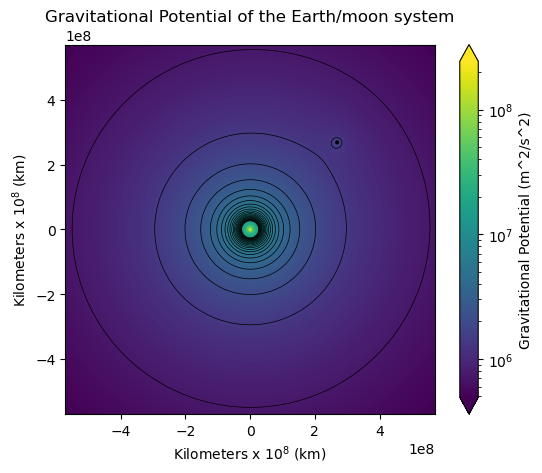

In [4]:
#Part 2.2
fig, ax = plt.subplots(1,1)
ax.contour(x_grid, y_grid, Z_Vals, levels = np.linspace(1*10**5, 1.5*10**7, 25), colors = ['k'], linewidths = 0.5)
meshE = ax.pcolormesh(x_grid, y_grid, Z_Vals)
meshM = ax.pcolormesh(x_grid, y_grid, Z_Vals)
ax.set_aspect("equal") 
ax.set_title('Gravitational Potential of the Earth/moon system')
ax.set_xlabel("Kilometers x 10$^8$ (km)")
ax.set_ylabel('Kilometers x 10$^8$ (km)')
pcm = ax.pcolormesh(x_grid, y_grid, Z_Vals, norm=colors.LogNorm(vmin=Z_Vals.min(), vmax=Z_Vals.max()), shading='auto')
cbar = fig.colorbar(pcm, ax=ax, extend='both')
cbar.set_label("Gravitational Potential (m^2/s^2)")
# plt.savefig("Part2_2.png")

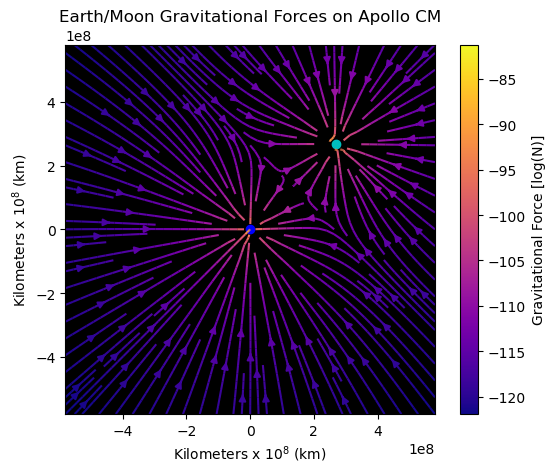

In [5]:
#Part 3
fig, ax = plt.subplots(1,1) 
ax.plot([0],[0], "bo")
ax.plot([x_mcart],[y_mcart], "co")

ny = 50
y = np.linspace(-5.8*10**8, 5.8*10**8, ny)
nx = 50
x = np.linspace(-5.8*10**8, 5.8*10**8, nx)
x_grid, y_grid = np.meshgrid(x,y)

Fx = np.zeros((ny, nx))
Fy = np.zeros((ny, nx))  

x_mcart = (3.8 * 10**8) / np.sqrt(2)
y_mcart = x_mcart.copy()
G=6.67*10**-11
m=5500
M1 = 5.9*10**24
M2 = 7.3*10**22

def FG(M, m, x1, y1, x2, y2):
    if np.isclose(x, 0) and np.isclose(y, 0):
        Fx = np.nan
        Fy = np.nan
    if np.isclose(x, x_mcart) and np.isclose(y, y_mcart):
        Fx = np.nan
        FY = np.nan
    else:
        r_squared = np.sqrt((x2-x1)**2 + (y2-y1)**2)**2
        vec_r = np.array([x2-x1, y2-y1])
        vec_r_hat = vec_r / np.linalg.norm(vec_r) 
        FG = -(G * M1 * m) / np.abs(r_squared)**2
        Fx = (FG / r_squared**2) * (vec_r_hat)[0]
        Fy = (FG / r_squared**2) * (vec_r_hat)[1]
    return Fx, Fy #looksgoodman

for y in range (ny):
    for x in range (nx): 
        F_g1_x, F_g1_y = FG(M1, m, 0, 0, x_grid[y,x], y_grid[y,x]) #y value controls row, x for column, thus swapped

        F_g2_x, F_g2_y = FG(M2, m, x_mcart, y_mcart, x_grid[y,x], y_grid[y,x])

        
        Fx[y,x] +=  (F_g1_x + F_g2_x)
        Fy[y,x] +=  (F_g1_y + F_g2_y) 

colors = np.log(np.hypot(Fx,Fy))
stream = ax.streamplot(x_grid, y_grid, Fx, Fy, density = 1.5, color = colors, cmap=cm.plasma)
ax.set_facecolor('k')
cbar = fig.colorbar(stream.lines)
ax.set_aspect("equal")
ax.set_title('Earth/Moon Gravitational Forces on Apollo CM')
ax.set_xlabel('Kilometers x 10$^8$ (km)')
ax.set_ylabel('Kilometers x 10$^8$ (km)')
cbar.set_label("Gravitational Force [log(N)]")
# plt.savefig("Part3.png")

In [6]:
#4:1
m0 = 2.8*10**6 #kg
mf = 7.5*10**5 #kg
delta_m = 1.3*10**4 #kg/s

T = (m0 - mf) / delta_m
print('Stage I Burn', T, 'Seconds (s) ')

Stage I Burn 157.69230769230768 Seconds (s) 


Total Δv at stage I burnout 1614.5620366575151 m/s


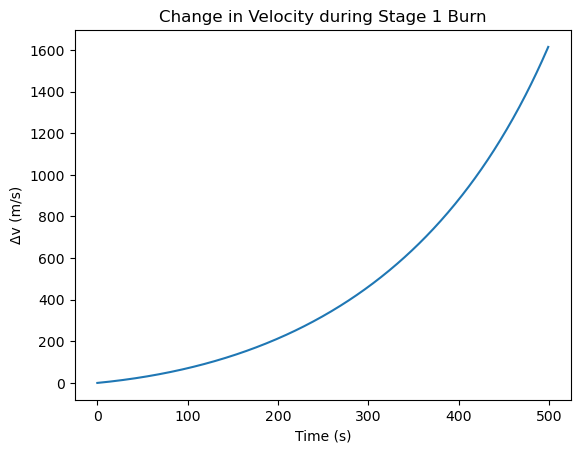

In [7]:
#4:2
fig1, ax1 = plt.subplots(1,1)

v_e = 2.4*10**3 #m/s
g = 9.81 #m/s^2
t = np.linspace(0, T, 500)

delta_v = (v_e * (np.log(m0 / (m0 - delta_m*t))) - g * t)

print('Total \u0394v at stage I burnout', np.max(delta_v), 'm/s')
ax1.plot(delta_v)
ax1.set_title('Change in Velocity during Stage 1 Burn')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('\u0394v (m/s)');
#GOOD RETURN
# plt.savefig("Part4_2.png")

In [8]:
#4:3
import scipy as sc
from scipy.integrate import quad

def V(t): 
    return (v_e * (np.log(m0 / (m0 - delta_m*t))) - g * t)

sum1,err1 = quad(V, 0, T) 
print('Altitude at stage I burnout', round(sum1/1000, 3), '\u00B1', round(err1/1000, 12), 'kilometers (km)')

Altitude at stage I burnout 74.094 ± 5.8e-11 kilometers (km)
